<a href="https://colab.research.google.com/github/KishoreKumar1308/ASL-Detection-using-CNN/blob/main/ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from PIL import Image
import tensorflow as tf

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/ASL/sign_mnist_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ASL/sign_mnist_test.csv")

In [4]:
train_data.sample(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
24694,2,66,79,88,93,98,102,105,108,111,...,165,165,165,168,169,169,169,170,169,169
14358,10,113,133,142,148,152,155,157,158,160,...,157,194,184,183,181,178,177,175,171,169
25001,8,188,189,190,191,191,191,191,190,190,...,222,185,187,161,118,153,190,139,116,148
17536,3,183,189,195,199,203,206,208,210,213,...,124,129,128,139,136,130,134,126,106,83
12028,1,170,171,174,177,178,178,178,180,180,...,11,30,71,83,57,81,98,85,56,39


In [5]:
labels = train_data["label"]
pixels = train_data.iloc[:,1:]

In [6]:
X_train = pixels.astype('float')/255
y_train = tf.keras.utils.to_categorical(labels)

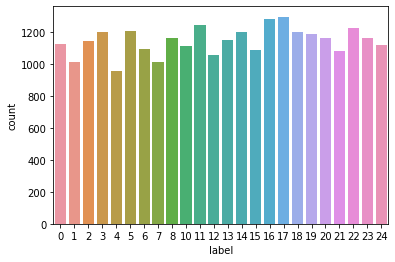

In [7]:
sns.countplot(data = train_data,x = "label")

In [8]:
alphabet_dict = {}
for i in range(0,26):
  alphabet_dict[i] = chr(65 + i)

In [9]:
alphabet_dict.pop(9)
alphabet_dict.pop(25)

'Z'

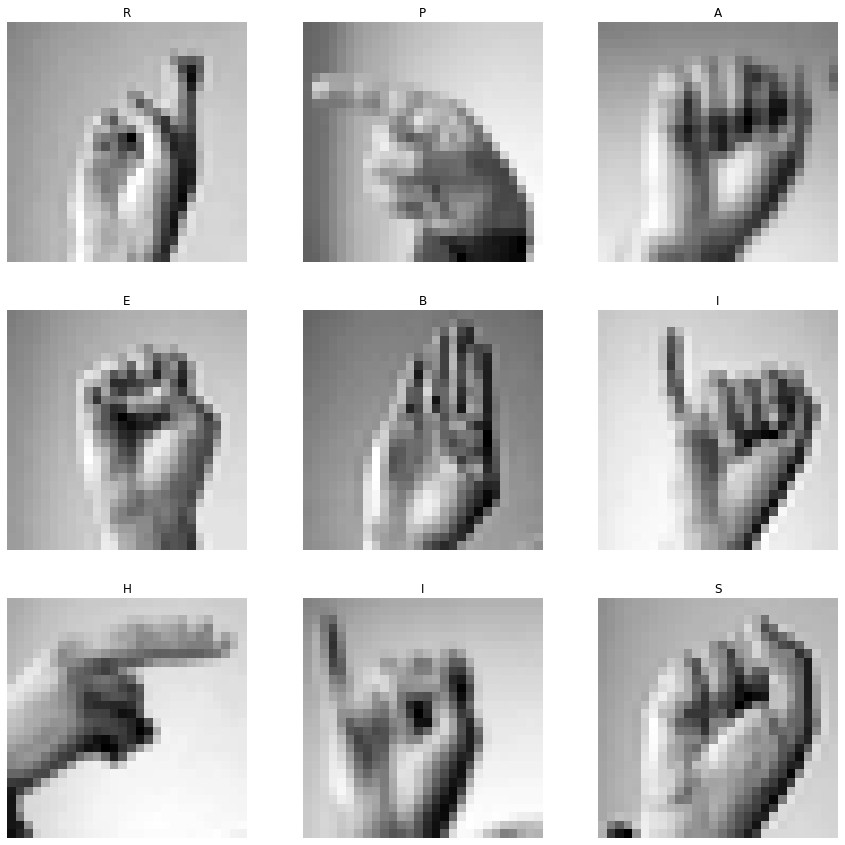

In [10]:
fig, axes = plt.subplots(3, 3, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(27455)
        img = np.array(X_train.iloc[index,:]).reshape(28,28)
        cloths = labels[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(alphabet_dict[cloths])
        axe.set_axis_off()

In [11]:
X_test = test_data.iloc[:,1:].astype('float')/255
y_test = tf.keras.utils.to_categorical(test_data['label'])

In [12]:
X_train = X_train.values.reshape((-1,28,28,1)) # Reshapping 784 columns into 3D
X_test = X_test.values.reshape((-1,28,28,1)) # Reshapping 784 columns into 3D

# Model Building

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

#### Data Augumentation

In [14]:
generated_data = ImageDataGenerator(rotation_range = 5,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1)

In [15]:
generated_data.fit(X_train)

In [16]:
gen = generated_data.flow(X_train,y_train)

In [17]:
lr_red = ReduceLROnPlateau(monitor = 'val_loss',min_lr = 0.0001,factor = 0.25,patience = 2,verbose = 1)
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 4,verbose = 1)

In [23]:
model = Sequential()
model.add(Conv2D(128, (3, 3),padding = 'same', input_shape=(28, 28, 1),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),padding = 'same',))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2),padding = 'same',))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(25,activation = "softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [25]:
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = 'accuracy')

In [26]:
history = model.fit(gen,epochs = 20,validation_data = (X_test,y_test),callbacks = [lr_red,es])

Epoch 1/20
858/858 [==============================] - 12s 13ms/step - loss: 1.1641 - accuracy: 0.6418 - val_loss: 0.4194 - val_accuracy: 0.8886 - lr: 0.0100
Epoch 2/20
858/858 [==============================] - 11s 12ms/step - loss: 0.3109 - accuracy: 0.9026 - val_loss: 0.1329 - val_accuracy: 0.9700 - lr: 0.0100
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1692 - accuracy: 0.9472 - val_loss: 0.0846 - val_accuracy: 0.9784 - lr: 0.0100
Epoch 4/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1124 - accuracy: 0.9665 - val_loss: 0.1198 - val_accuracy: 0.9625 - lr: 0.0100
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0804 - accuracy: 0.9774 - val_loss: 0.0532 - val_accuracy: 0.9808 - lr: 0.0100
Epoch 6/20
858/858 [==============================] - 11s 12ms/step - loss: 0.0606 - accuracy: 0.9837 - val_loss: 0.0327 - val_accuracy: 0.9901 - lr: 0.0100
Epoch 7/20
858/858 [==============================] - 11s 

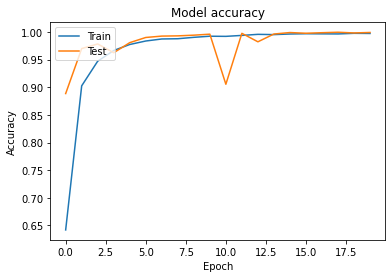

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

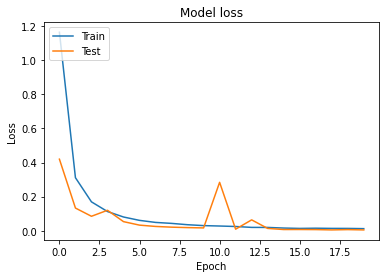

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
print(f"Evaluation {model.evaluate(X_test,y_test)}")

225/225 [==============================] - 1s 4ms/step - loss: 0.0046 - accuracy: 0.9992
Evaluation [0.004598583094775677, 0.9991633892059326]


In [30]:
model.save('asl_5.h5')

In [22]:
tf.keras.backend.clear_session()